<a href="https://colab.research.google.com/github/Diya-png/Anomaly-Detection-in-Medical-Imaging/blob/main/Anomaly_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Define paths
zip_path = "/content/brain-tumor-mri-dataset.zip"
drive_path = "/content/drive/MyDrive/brain-tumor-mri-dataset.zip"
# Move the ZIP file to Drive
shutil.move(zip_path, drive_path)

print(f"ZIP file successfully moved to: {drive_path}")


ZIP file successfully moved to: /content/drive/MyDrive/brain-tumor-mri-dataset.zip


In [ ]:
import os
import zipfile

# Define paths
zip_path = "/content/drive/MyDrive/brain-tumor-mri-dataset.zip"
extract_path = "/content/brain-tumor-mri-dataset"


if not os.path.exists("/content/brain-tumor-mri-dataset.zip"):
    !cp "$zip_path" /content/
    print("Copied dataset zip file from Drive to Colab.")

# Extract ZIP file
with zipfile.ZipFile("/content/brain-tumor-mri-dataset.zip", "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")

print("Dataset is ready in Colab's storage!")

Copied dataset zip file from Drive to Colab.
Extraction completed!
Dataset is ready in Colab's storage!


## Folder structure before Relabeling

In [ ]:
dataset_path = "/content/brain-tumor-mri-dataset"

# Check folder structure
print(os.listdir(dataset_path))
print("Train files:", len(os.listdir(os.path.join(dataset_path, "Training"))))
print("Test files:", len(os.listdir(os.path.join(dataset_path, "Testing"))))

['Training', 'Testing']
Train files: 4
Test files: 4


In [ ]:
import os
import shutil

# Define paths for original and new dataset
original_train_dir = "/content/brain-tumor-mri-dataset/Training"
original_test_dir = "/content/brain-tumor-mri-dataset/Testing"
new_train_dir = "/content/brain-tumor-mri-dataset/train"
new_test_dir = "/content/brain-tumor-mri-dataset/test"

# Define mapping
binary_mapping = {
    "glioma": "anomaly",
    "meningioma": "anomaly",
    "pituitary": "anomaly",
    "notumor": "normal"
}

# Function to create new binary dataset
def create_binary_dataset(original_dir, new_dir):
    for category in os.listdir(original_dir):
        label = binary_mapping[category.lower()]
        new_category_path = os.path.join(new_dir, label)
        os.makedirs(new_category_path, exist_ok=True)

        # Move images
        for img in os.listdir(os.path.join(original_dir, category)):
            src = os.path.join(original_dir, category, img)
            dest = os.path.join(new_category_path, img)
            shutil.copy(src, dest)

# Apply to both train and test sets
create_binary_dataset(original_train_dir, new_train_dir)
create_binary_dataset(original_test_dir, new_test_dir)

print("Binary dataset created successfully!")


Binary dataset created successfully!


## After Relabeling

In [ ]:
dataset_path = "/content/brain-tumor-mri-dataset"

print(os.listdir(dataset_path))
print("Train files:", len(os.listdir(os.path.join(dataset_path, "train"))))
print("Test files:", len(os.listdir(os.path.join(dataset_path, "test"))))

['test', 'train', 'Training', 'Testing']
Train files: 2
Test files: 2


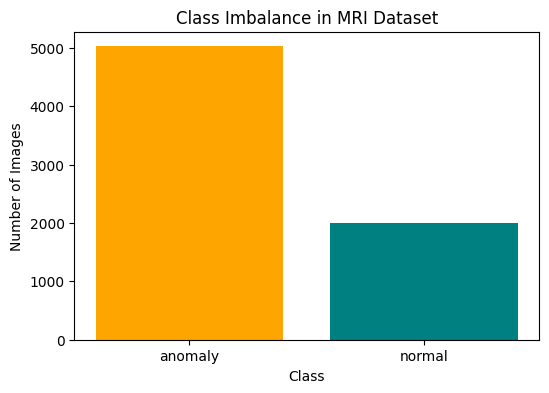

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = "/content/brain-tumor-mri-dataset/train"
test_dir = "/content/brain-tumor-mri-dataset/test"


def count_images(directory):
    class_counts = {}
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            class_counts[category] = len(os.listdir(category_path))
    return class_counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

total_counts = {key: train_counts.get(key, 0) + test_counts.get(key, 0) for key in set(train_counts) | set(test_counts)}

plt.figure(figsize=(6, 4))
plt.bar(total_counts.keys(), total_counts.values(), color=['orange', 'teal'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Imbalance in MRI Dataset")
plt.xticks(rotation=0)
plt.show()


## Checking Image Data

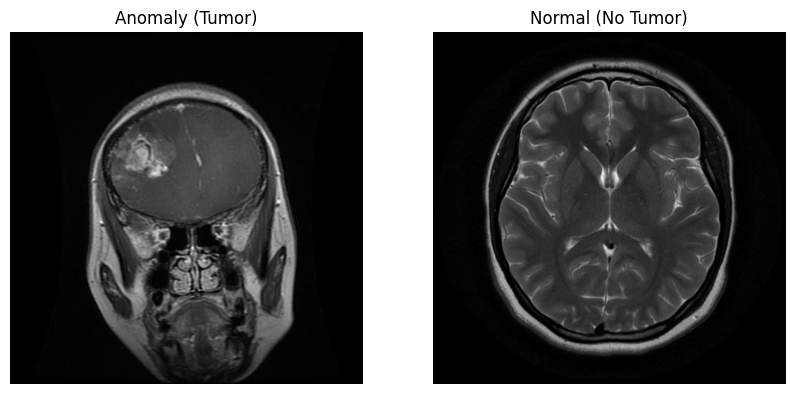

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os


image_path1 = os.path.join('/content/brain-tumor-mri-dataset/train/anomaly/Tr-glTr_0000.jpg')  # Anomaly
image_path2 = os.path.join('/content/brain-tumor-mri-dataset/train/normal/Tr-no_0012.jpg')  # Normal


image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Convert BGR to RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image 1 (Anomaly)
axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title("Anomaly (Tumor)")

# Image 2 (Normal)
axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title("Normal (No Tumor)")

plt.show()


## Loading and Preprocessing Data

In [ ]:
import tensorflow as tf
import os

# Define dataset paths
train_dir = "/content/brain-tumor-mri-dataset/train"
test_dir = "/content/brain-tumor-mri-dataset/test"

# Load dataset with 80-20 train-validation split
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(150, 150),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(150, 150),
    batch_size=32
)


test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=32
)

# Normalize pixel values (0-1 range)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

print("Train and test datasets loaded successfully!")

Found 5712 files belonging to 2 classes.
Using 4570 files for training.
Found 5712 files belonging to 2 classes.
Using 1142 files for validation.
Found 1311 files belonging to 2 classes.
Train and test datasets loaded successfully!


## K-Fold Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold


def dataset_to_numpy(dataset):
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

# Convert train dataset to array for cross-validation
X, y = dataset_to_numpy(train_ds)

# Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  train-validation splits
folds = []
for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    folds.append((X_train, y_train, X_val, y_val))

print("K-Fold Cross-Validation splits created!")


K-Fold Cross-Validation splits created!


## CNN Model

## Applying Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])


normalization_layer = tf.keras.layers.Rescaling(1./255)


train_ds = train_ds.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))

print("Train and test datasets loaded successfully with augmentation!")

Train and test datasets loaded successfully with augmentation!


## Adjusting Class Weights to Handle Imbalanced Data



In [ ]:
total_samples = 2000 + 5000
class_weights = {
    0: total_samples / (2 * 2000),  # Normal class weight
    1: total_samples / (2 * 5000)   # Anomaly class weight
}
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print("Computed Class Weights:", class_weight_dict)


Computed Class Weights: {0: 1.75, 1: 0.7}


## Using L2 Regularization, Dropout for OverFitting


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint

hists= []

for fold, (X_train, y_train, X_val, y_val) in enumerate(folds):
    print(f"Training Fold {fold + 1}...")

    # Create a new model for each fold
    model = models.Sequential([
        layers.Input(shape=(150, 150, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(1, activation='sigmoid')
    ])


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    checkpoint_callback = ModelCheckpoint(
    "best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
    )



    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        validation_data=(X_val, y_val),
        class_weight=class_weight_dict,
        callbacks=[checkpoint_callback]
    )

    hists.append(history.history)

    print(f"Fold {fold + 1} Completed\n")

Training Fold 1...
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8452 - loss: 0.9600
Epoch 1: val_accuracy improved from -inf to 0.72429, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.8456 - loss: 0.9585 - val_accuracy: 0.7243 - val_loss: 9.1921
Epoch 2/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9320 - loss: 0.5786
Epoch 2: val_accuracy did not improve from 0.72429
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9319 - loss: 0.5791 - val_accuracy: 0.7243 - val_loss: 15.1716
Epoch 3/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9439 - loss: 0.5500
Epoch 3: val_accuracy did not improve from 0.72429
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9439 - loss: 0.5492 - val_accuracy: 0.7243 - val_loss: 15.7124
Epoch 4/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9448 - loss: 0.4931
Epoch 4: val_accuracy improved from 0.72429 to 0.73195, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9449 - loss: 0.4933 - val_accuracy: 0.7319 - val_loss: 9.9979
Epoch 5/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9504 - loss: 0.4803
Epoch 5: val_accuracy improved from 0.73195 to 0.78009, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9504 - loss: 0.4801 - val_accuracy: 0.7801 - val_loss: 5.0933
Epoch 6/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9571 - loss: 0.4543
Epoch 6: val_accuracy improved from 0.78009 to 0.85996, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9571 - loss: 0.4545 - val_accuracy: 0.8600 - val_loss: 2.4779
Epoch 7/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9561 - loss: 0.4321
Epoch 7: val_accuracy improved from 0.85996 to 0.91685, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9561 - loss: 0.4323 - val_accuracy: 0.9168 - val_loss: 2.0148
Epoch 8/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9669 - loss: 0.4017
Epoch 8: val_accuracy improved from 0.91685 to 0.94530, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9670 - loss: 0.4022 - val_accuracy: 0.9453 - val_loss: 1.0386
Epoch 9/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9675 - loss: 0.4005
Epoch 9: val_accuracy improved from 0.94530 to 0.94639, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9675 - loss: 0.4005 - val_accuracy: 0.9464 - val_loss: 1.3757
Epoch 10/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9648 - loss: 0.3876
Epoch 10: val_accuracy improved from 0.94639 to 0.94967, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9650 - loss: 0.3875 - val_accuracy: 0.9497 - val_loss: 1.0074
Fold 1 Completed

Training Fold 2...
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8586 - loss: 0.9030
Epoch 1: val_accuracy improved from -inf to 0.72429, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.8589 - loss: 0.9019 - val_accuracy: 0.7243 - val_loss: 8.2169
Epoch 2/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9245 - loss: 0.5844
Epoch 2: val_accuracy did not improve from 0.72429
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9247 - loss: 0.5837 - val_accuracy: 0.7243 - val_loss: 13.0521
Epoch 3/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9373 - loss: 0.5624
Epoch 3: val_accuracy did not improve from 0.72429
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9373 - loss: 0.5615 - val_accuracy: 0.7243 - val_loss: 11.7673
Epoch 4/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9503 - loss: 0.4812
Epoch 4: val_accuracy improved from 0.72429 to 0.76149, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9503 - loss: 0.4813 - val_accuracy: 0.7615 - val_loss: 5.1689
Epoch 5/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9613 - loss: 0.4474
Epoch 5: val_accuracy improved from 0.76149 to 0.85558, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.9611 - loss: 0.4475 - val_accuracy: 0.8556 - val_loss: 2.4433
Epoch 6/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9554 - loss: 0.4492
Epoch 6: val_accuracy improved from 0.85558 to 0.91904, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9555 - loss: 0.4490 - val_accuracy: 0.9190 - val_loss: 1.1753
Epoch 7/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9617 - loss: 0.4200
Epoch 7: val_accuracy improved from 0.91904 to 0.94311, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9617 - loss: 0.4201 - val_accuracy: 0.9431 - val_loss: 0.7679
Epoch 8/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9689 - loss: 0.4192
Epoch 8: val_accuracy improved from 0.94311 to 0.94639, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.9689 - loss: 0.4191 - val_accuracy: 0.9464 - val_loss: 0.6396
Epoch 9/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9694 - loss: 0.4019
Epoch 9: val_accuracy improved from 0.94639 to 0.96499, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9693 - loss: 0.4018 - val_accuracy: 0.9650 - val_loss: 0.5807
Epoch 10/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9717 - loss: 0.4043
Epoch 10: val_accuracy did not improve from 0.96499
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9716 - loss: 0.4040 - val_accuracy: 0.9595 - val_loss: 0.5379
Fold 2 Completed

Training Fold 3...
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8302 - loss: 0.9649
Epoch 1: val_accuracy improved from -inf to 0.72429, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.8307 - loss: 0.9633 - val_accuracy: 0.7243 - val_loss: 6.4646
Epoch 2/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9289 - loss: 0.5820
Epoch 2: val_accuracy did not improve from 0.72429
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9292 - loss: 0.5816 - val_accuracy: 0.7243 - val_loss: 8.6857
Epoch 3/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9372 - loss: 0.5396
Epoch 3: val_accuracy did not improve from 0.72429
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9372 - loss: 0.5396 - val_accuracy: 0.7243 - val_loss: 7.6821
Epoch 4/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9534 - loss: 0.5053
Epoch 4: val_accuracy improved from 0.72429 to 0.76915, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.9534 - loss: 0.5051 - val_accuracy: 0.7691 - val_loss: 4.0317
Epoch 5/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9601 - loss: 0.4648
Epoch 5: val_accuracy improved from 0.76915 to 0.85120, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9600 - loss: 0.4648 - val_accuracy: 0.8512 - val_loss: 1.9331
Epoch 6/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9543 - loss: 0.4564
Epoch 6: val_accuracy improved from 0.85120 to 0.89387, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.9543 - loss: 0.4563 - val_accuracy: 0.8939 - val_loss: 1.2737
Epoch 7/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9591 - loss: 0.4425
Epoch 7: val_accuracy improved from 0.89387 to 0.93217, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9590 - loss: 0.4427 - val_accuracy: 0.9322 - val_loss: 0.8004
Epoch 8/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9654 - loss: 0.4192
Epoch 8: val_accuracy improved from 0.93217 to 0.93982, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.9654 - loss: 0.4191 - val_accuracy: 0.9398 - val_loss: 0.5928
Epoch 9/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9708 - loss: 0.4137
Epoch 9: val_accuracy improved from 0.93982 to 0.94639, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.9708 - loss: 0.4133 - val_accuracy: 0.9464 - val_loss: 0.5828
Epoch 10/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9711 - loss: 0.3852
Epoch 10: val_accuracy did not improve from 0.94639
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9711 - loss: 0.3855 - val_accuracy: 0.9256 - val_loss: 0.6208
Fold 3 Completed

Training Fold 4...
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8532 - loss: 0.8843
Epoch 1: val_accuracy improved from -inf to 0.72538, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 148ms/step - accuracy: 0.8535 - loss: 0.8833 - val_accuracy: 0.7254 - val_loss: 8.4976
Epoch 2/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9275 - loss: 0.5759
Epoch 2: val_accuracy did not improve from 0.72538
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9277 - loss: 0.5757 - val_accuracy: 0.7254 - val_loss: 14.1515
Epoch 3/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9354 - loss: 0.5429
Epoch 3: val_accuracy did not improve from 0.72538
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9356 - loss: 0.5425 - val_accuracy: 0.7254 - val_loss: 12.9950
Epoch 4/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9561 - loss: 0.4779
Epoch 4: val_accuracy improved from 0.72538 to 0.73961, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9561 - loss: 0.4782 - val_accuracy: 0.7396 - val_loss: 8.9837
Epoch 5/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9580 - loss: 0.4731
Epoch 5: val_accuracy improved from 0.73961 to 0.79212, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9579 - loss: 0.4730 - val_accuracy: 0.7921 - val_loss: 5.3223
Epoch 6/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9585 - loss: 0.4466
Epoch 6: val_accuracy improved from 0.79212 to 0.88950, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - accuracy: 0.9585 - loss: 0.4467 - val_accuracy: 0.8895 - val_loss: 2.3148
Epoch 7/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9632 - loss: 0.4299
Epoch 7: val_accuracy improved from 0.88950 to 0.92779, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.9633 - loss: 0.4295 - val_accuracy: 0.9278 - val_loss: 1.4223
Epoch 8/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9629 - loss: 0.4375
Epoch 8: val_accuracy improved from 0.92779 to 0.93654, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9629 - loss: 0.4370 - val_accuracy: 0.9365 - val_loss: 1.0256
Epoch 9/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9750 - loss: 0.3850
Epoch 9: val_accuracy did not improve from 0.93654
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9748 - loss: 0.3853 - val_accuracy: 0.8709 - val_loss: 0.8281
Epoch 10/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9696 - loss: 0.3830
Epoch 10: val_accuracy improved from 0.93654 to 0.94201, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.9696 - loss: 0.3832 - val_accuracy: 0.9420 - val_loss: 0.8376
Fold 4 Completed

Training Fold 5...
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8662 - loss: 0.9341
Epoch 1: val_accuracy improved from -inf to 0.72538, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.8664 - loss: 0.9325 - val_accuracy: 0.7254 - val_loss: 8.4982
Epoch 2/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9319 - loss: 0.5916
Epoch 2: val_accuracy did not improve from 0.72538
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9320 - loss: 0.5909 - val_accuracy: 0.7254 - val_loss: 12.0221
Epoch 3/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9395 - loss: 0.5192
Epoch 3: val_accuracy did not improve from 0.72538
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.5193 - val_accuracy: 0.7254 - val_loss: 11.7301
Epoch 4/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9414 - loss: 0.5067
Epoch 4: val_accuracy improved from 0.72538 to 0.74836, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9415 - loss: 0.5066 - val_accuracy: 0.7484 - val_loss: 8.1633
Epoch 5/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9445 - loss: 0.4815
Epoch 5: val_accuracy improved from 0.74836 to 0.82495, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.9447 - loss: 0.4813 - val_accuracy: 0.8249 - val_loss: 4.2836
Epoch 6/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9523 - loss: 0.4589
Epoch 6: val_accuracy improved from 0.82495 to 0.87199, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.9524 - loss: 0.4588 - val_accuracy: 0.8720 - val_loss: 2.0550
Epoch 7/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9646 - loss: 0.4196
Epoch 7: val_accuracy improved from 0.87199 to 0.90700, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - accuracy: 0.9646 - loss: 0.4196 - val_accuracy: 0.9070 - val_loss: 1.5814
Epoch 8/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9631 - loss: 0.4153
Epoch 8: val_accuracy improved from 0.90700 to 0.93107, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.9631 - loss: 0.4152 - val_accuracy: 0.9311 - val_loss: 1.0422
Epoch 9/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9708 - loss: 0.3927
Epoch 9: val_accuracy improved from 0.93107 to 0.95077, saving model to best_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.9708 - loss: 0.3926 - val_accuracy: 0.9508 - val_loss: 0.8448
Epoch 10/10
113/115 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9729 - loss: 0.3947
Epoch 10: val_accuracy did not improve from 0.95077
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9728 - loss: 0.3948 - val_accuracy: 0.9201 - val_loss: 0.8397
Fold 5 Completed



## Plotting Accuracy and Loss

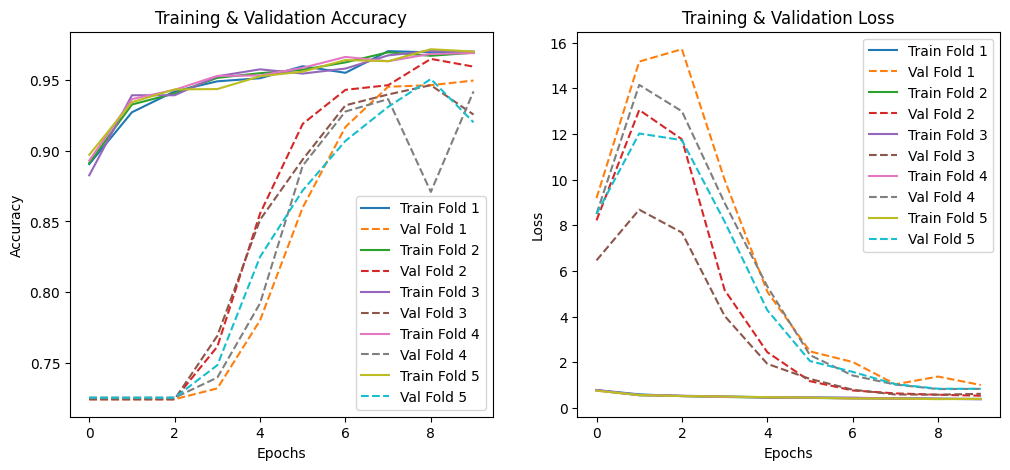

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hists):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for i, hist in enumerate(hists):
        plt.plot(hist['accuracy'], label=f'Train Fold {i+1}')
        plt.plot(hist['val_accuracy'], '--', label=f'Val Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    for i, hist in enumerate(hists):
        plt.plot(hist['loss'], label=f'Train Fold {i+1}')
        plt.plot(hist['val_loss'], '--', label=f'Val Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.show()


plot_history(hists)


## Testing

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.h5")

test_loss, test_acc = best_model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9386 - loss: 0.8038
Test Accuracy: 93.75%
Test Loss: 1.0393


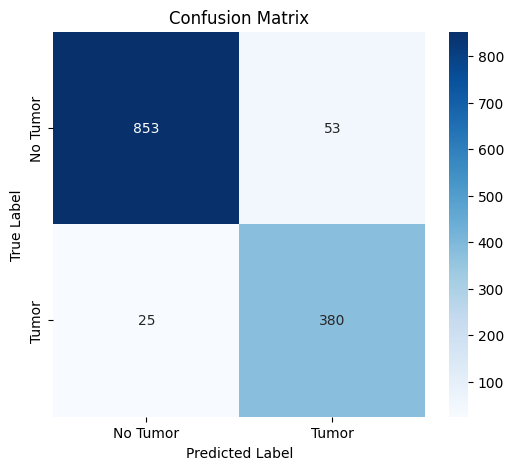


Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.97      0.94      0.96       906
       Tumor       0.88      0.94      0.91       405

    accuracy                           0.94      1311
   macro avg       0.92      0.94      0.93      1311
weighted avg       0.94      0.94      0.94      1311



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))

